In [1]:
from torch.utils.data import DataLoader, IterableDataset
from main import RESDataset

import os
import argparse

DATASET_PATH = '/Users/antoniaboca/Downloads/raw/RES/data'

parser = argparse.ArgumentParser()
parser.add_argument('--model', type=str, default='gvp', choices=['gvp'])
parser.add_argument('--epochs', type=int, default=10)
parser.add_argument('--lr', type=float, default=1e-3)
parser.add_argument('--n_layers', type=int, default=5)
parser.add_argument('--gpus', type=int, default=0)
parser.add_argument('--data_file', type=str, default=DATASET_PATH)
parser.add_argument('--data_workers', type=int, default=0)
parser.add_argument('--max_len', type=int, default=None)
parser.add_argument('--sample_per_item', type=int, default=None)

args = parser.parse_args(['--model', 'gvp'])

train_dataloader = DataLoader(RESDataset(os.path.join(args.data_file, 'train'), shuffle=True, 
                        max_len=args.max_len, sample_per_item = args.sample_per_item), 
                        batch_size=None, num_workers=args.data_workers)
val_dataloader = DataLoader(RESDataset(os.path.join(args.data_file, 'val'), 
                    max_len=args.max_len, sample_per_item = args.sample_per_item), 
                    batch_size=None, num_workers=args.data_workers)
test_dataloader = DataLoader(RESDataset(os.path.join(args.data_file, 'test'), 
                    max_len=args.max_len, sample_per_item = args.sample_per_item), 
                    batch_size=None, num_workers=args.data_workers)

/Users/antoniaboca/miniconda3/envs/diss/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
gen = iter(train_dataloader)

In [3]:
graph = next(gen)

In [4]:
graph

Data(x=[193, 3], edge_index=[2, 2494], node_type=[193], edge_s=[2494, 16], edge_v=[2494, 1, 3], label=14, ca_idx=1, ensemble='4ccw')

In [71]:
next(gen)

Data(x=[437, 3], edge_index=[2, 6704], node_type=[437], edge_s=[6704, 16], edge_v=[6704, 1, 3], label=15, ca_idx=299, ensemble='4ccw')

In [6]:
next(gen)

Data(x=[966, 3], edge_index=[2, 15478], node_type=[966], edge_s=[15478, 16], edge_v=[15478, 1, 3], label=4, ca_idx=41, ensemble='4ogg')

In [75]:
y = next(gen)
while len(y.x) > 100:
    y = next(gen)
    

In [77]:
from protein_graph import AtomGraphBuilder
from proteins import STANDARD_ELEMENTS

_element_alphabet = {el: i for i, el in enumerate(STANDARD_ELEMENTS)}

graph_builder = AtomGraphBuilder(_element_alphabet)



In [78]:
from biopandas.pdb import PandasPdb as pandas_pdb

ppdb = pandas_pdb().fetch_pdb('1kda')

In [86]:
atoms = ppdb.df['ATOM']
if (atoms['residue_name'] == 'UNK').any():
    raise Exception('Residue is unknown')
pdb_file = '1kda'

atoms = atoms.rename(columns={
            'x_coord': 'x', 
            'y_coord':'y', 
            'z_coord': 'z', 
            'element_symbol': 'element', 
            'atom_name': 'name', 
            'residue_name': 'resname'})

try:
    graph = graph_builder(atoms)
except Exception:
    with open('protein_log.txt', 'a+') as handle:
        print(f'Could not build residue graph for {pdb_file}', file=handle)

In [88]:
graph

Data(x=[1091, 3], edge_index=[2, 17672], node_type=[1091], edge_s=[17672, 16], edge_v=[17672, 1, 3])

In [89]:
!pip3 install networkx

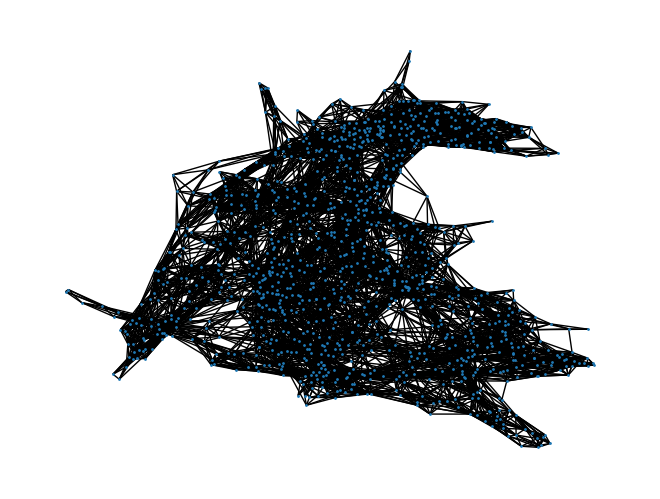

In [92]:
import torch_geometric as tg
import networkx as nx
g = tg.utils.to_networkx(graph, to_undirected=True)

nx.draw(g, node_size=1)

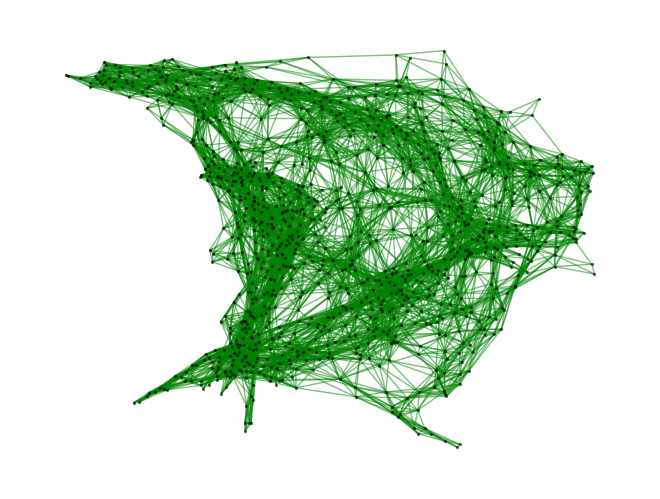

In [98]:
nx.draw(g, node_size=2, edge_color='green', node_color='black', alpha=0.5)

In [28]:
DATASET_PATH = '/Users/antoniaboca/Downloads/raw/RES/data'

indices = '/Users/antoniaboca/Downloads/indices/train_indices.txt'

In [32]:
DATASET_PATH

'/Users/antoniaboca/Downloads/raw/RES/data'

In [33]:
from lmdb_dataset import LMDBDataset

dataset = LMDBDataset(DATASET_PATH)
with open(indices, 'r') as handle:
    lines = handle.readlines()
    numbers = [int(line.strip()) for line in lines]

In [44]:
from atom3d.datasets import LMDBDataset
dataset = LMDBDataset(DATASET_PATH)

In [57]:
len(dataset[3]['subunit_indices'])

47

In [58]:
indices

'/Users/antoniaboca/Downloads/indices/train_indices.txt'

In [59]:
from tqdm import tqdm
totals = 0
for idx in tqdm(numbers):
    totals += len(dataset[int(idx)]['subunit_indices'])

100%|██████████| 21072/21072 [06:32<00:00, 53.70it/s]


In [60]:
print(totals)

3820837
